<a href="https://colab.research.google.com/github/ocaes/ImageSegmentation/blob/main/Satellite_Image_Segmentation_with_Segment_Anything_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install segment-geospatial

In [2]:
!pip install leafmap

In [3]:
import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff

In [4]:
m = leafmap.Map(center=[-29.958667,28.274855], zoom=17, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[-29.958667, 28.274855], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [5]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [28.271889,-29.956624,28.280355,-29.962470]

In [6]:
image = "satellite.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=17, source="Satellite", overwrite=True)

Downloaded image 01/16
Downloaded image 02/16
Downloaded image 03/16
Downloaded image 04/16
Downloaded image 05/16
Downloaded image 06/16
Downloaded image 07/16
Downloaded image 08/16
Downloaded image 09/16
Downloaded image 10/16
Downloaded image 11/16
Downloaded image 12/16
Downloaded image 13/16
Downloaded image 14/16
Downloaded image 15/16
Downloaded image 16/16
Saving GeoTIFF. Please wait...
Image saved to satellite.tif


Uncomment this line if using own image

In [7]:
# image = '/path/to/your/own/image.tif'

In [8]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(center=[-29.959547, 28.276122], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [9]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=None,
)

In [10]:
sam.generate(image, output="masks.tif", foreground=True, unique=True)

In [11]:
sam.show_masks(cmap="binary_r")

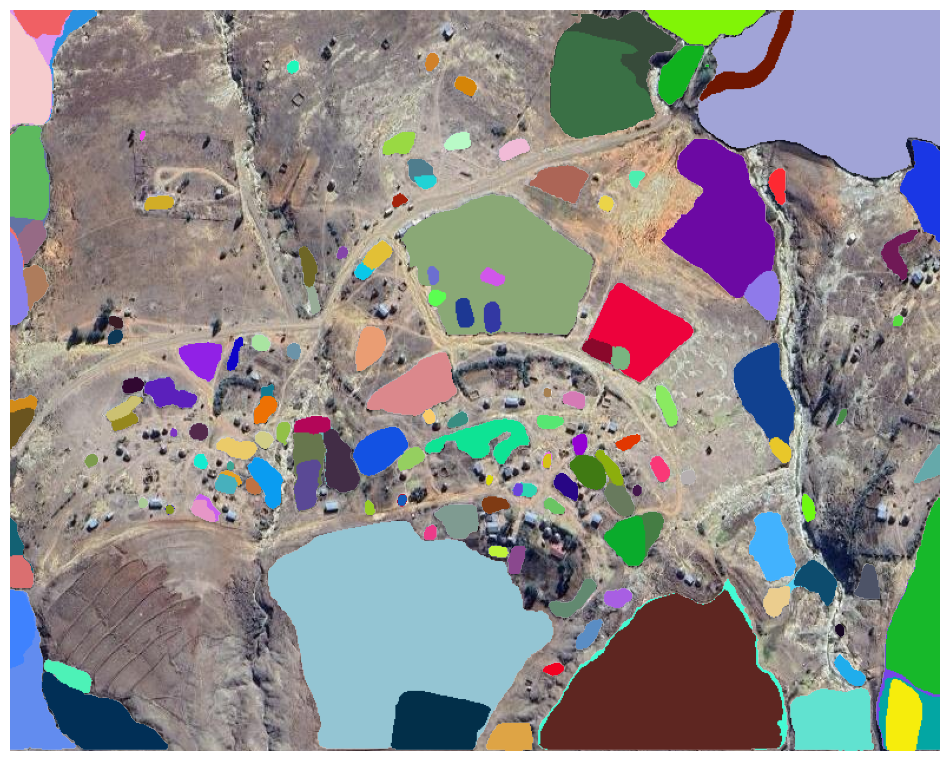

In [12]:
sam.show_anns(axis="off", alpha=1, output="annotations.tif")


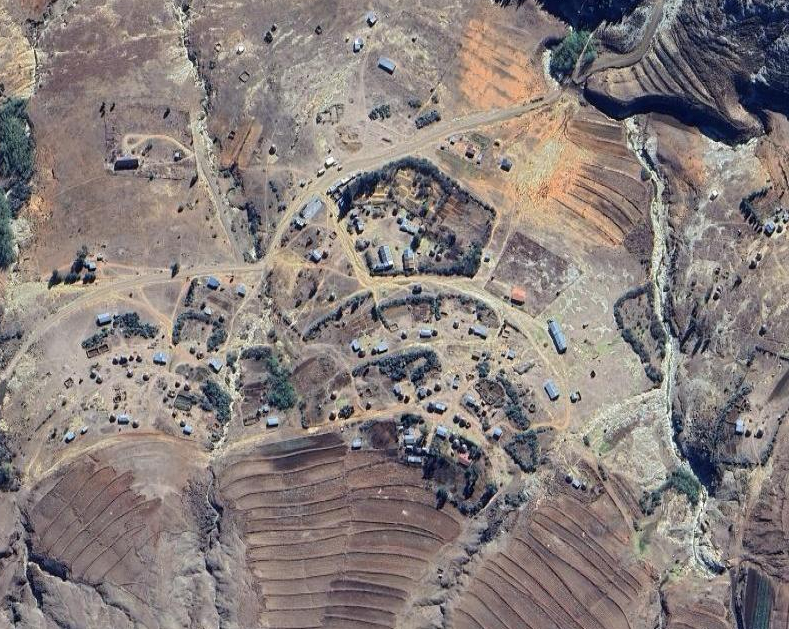
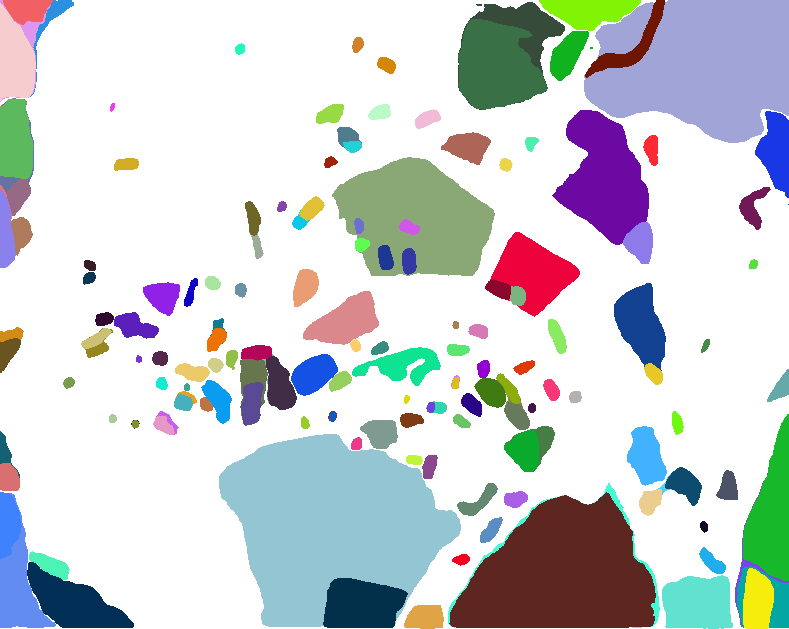

In [13]:
leafmap.image_comparison(
    "satellite.tif",
    "annotations.tif",
    label1="Satellite Image",
    label2="Image Segmentation",
)

In [14]:
m.add_raster("annotations.tif", alpha=0.5, layer_name="Masks")
m

Map(center=[-29.959547, 28.276122], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [15]:
sam.tiff_to_vector("masks.tif", "masks.gpkg")

In [16]:
sam_kwargs = {
    "points_per_side": 32,
    "pred_iou_thresh": 0.86,
    "stability_score_thresh": 0.92,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 100,
}

In [17]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=sam_kwargs,
)

In [18]:
sam.generate(image, output="masks2.tif", foreground=True)

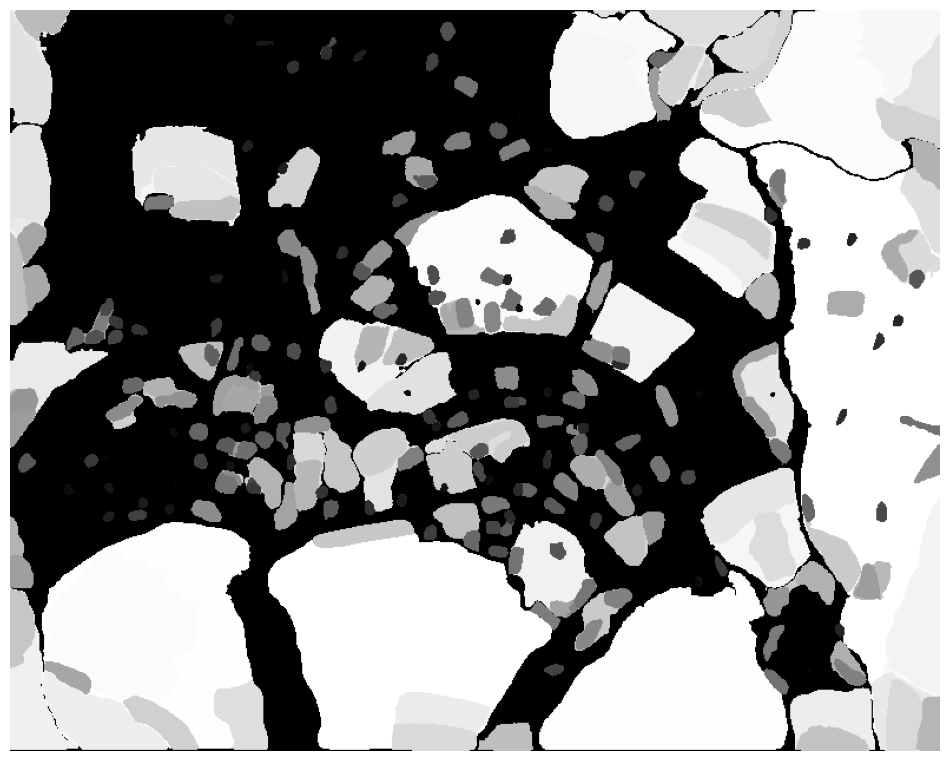

In [19]:
sam.show_masks(cmap="binary_r")

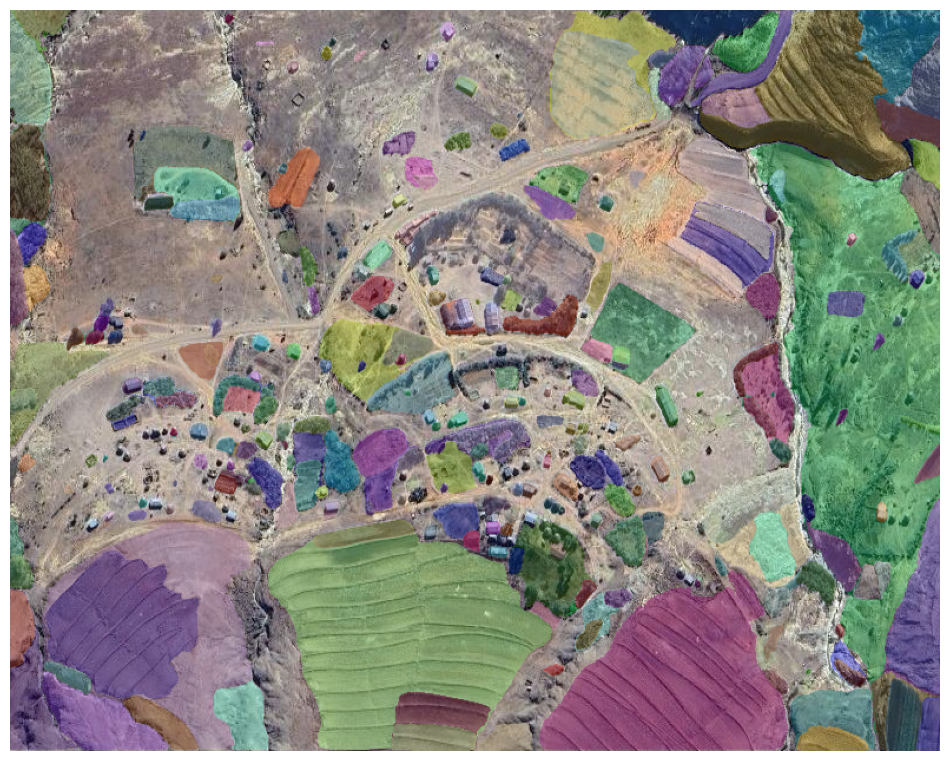

In [20]:
sam.show_anns(axis="off", opacity=1, output="annotations2.tif")


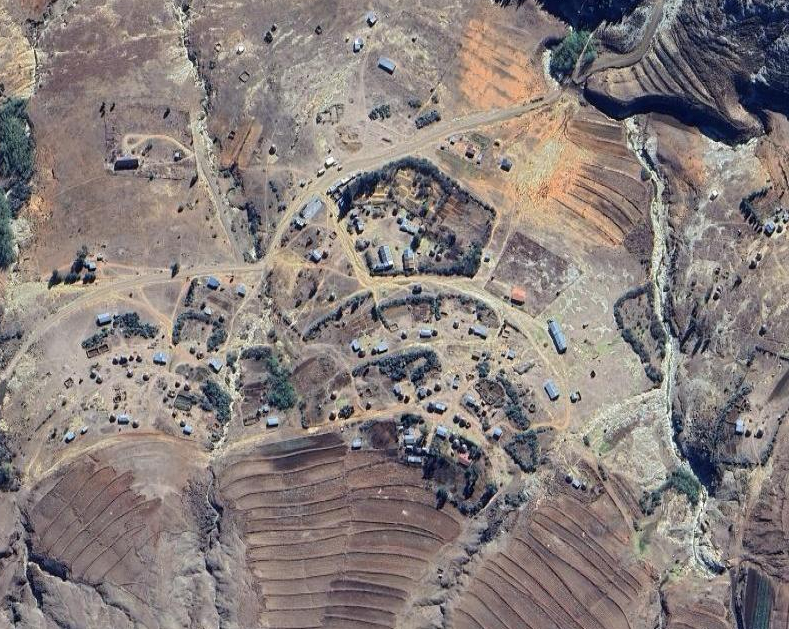
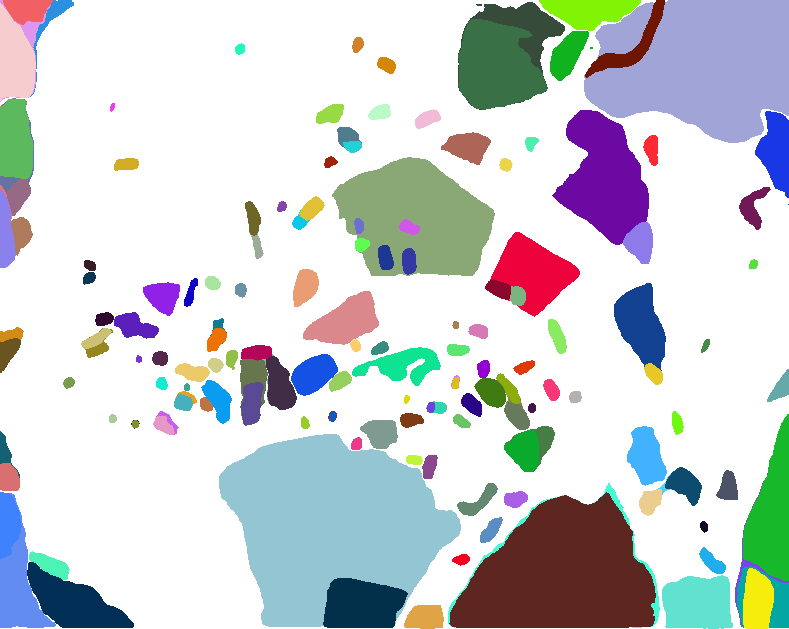

In [21]:
leafmap.image_comparison(
    image,
    "annotations.tif",
    label1="Image",
    label2="Image Segmentation",
)

In [22]:
overlay_images(image, "annotations2.tif", backend="TkAgg")

The TkAgg backend is not supported in Google Colab. The overlay_images function will not work on Colab.
